In [1]:

!pip install ipython-sql

  Obtaining dependency information for ipython-sql from https://files.pythonhosted.org/packages/30/8f/9e50fa53ffc371483f9d1b90c1175b706d28a2e978e90a8894035af01905/ipython_sql-0.5.0-py3-none-any.whl.metadata
  Obtaining dependency information for prettytable from https://files.pythonhosted.org/packages/02/c7/5613524e606ea1688b3bdbf48aa64bafb6d0a4ac3750274c43b6158a390f/prettytable-3.16.0-py3-none-any.whl.metadata
  Obtaining dependency information for sqlalchemy>=2.0 from https://files.pythonhosted.org/packages/9d/8e/8344f8ae1cb6a479d0741c02cd4f666925b2bf02e2468ddaf5ce44111f30/sqlalchemy-2.0.41-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for sqlparse from https://files.pythonhosted.org/packages/a9/5c/bfd6bd0bf979426d405cc6e71eceb8701b148b16c21d2dc3c261efc61c7b/sqlparse-0.5.3-py3-none-any.whl.metadata
  Obtaining dependency information for ipython-genutils from https://files.pythonhosted.org/packages/fa/bc/9bd3b5c2b4774d5f33b2d544f1460be9df7df2fe42f352135381c347c


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import psycopg2
from psycopg2 import sql
from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT

server_params = {
    "host": "localhost",
    "user": "postgres",
    "password": "1234", 
    "port": "5432" 
}

try:
  
    conn = psycopg2.connect(**server_params)
    conn.set_isolation_level(ISOLATION_LEVEL_AUTOCOMMIT)  
    
    with conn.cursor() as cur:
        
        cur.execute("SELECT 1 FROM pg_database WHERE datname='medical__db'")
        exists = cur.fetchone()
        
        if not exists:
          
            cur.execute(sql.SQL("CREATE DATABASE medical__db"))
            print("База данных medical__db успешно создана")
        else:
            print("База данных medical__db уже существует")
            
except psycopg2.Error as e:
    print(f"Ошибка при создании базы данных: {e}")
finally:
    if conn:
        conn.close()

База данных medical__db успешно создана


In [ ]:
%%sql

-- Создание таблицы докторов
CREATE TABLE IF NOT EXISTS DOCTOR (
    DOCTOR_ID SERIAL PRIMARY KEY,
    LAST_NAME VARCHAR(50) NOT NULL,
    POSITION VARCHAR(50) NOT NULL,
    EXPERIENCE_YEARS INTEGER NOT NULL CHECK (EXPERIENCE_YEARS >= 0)
);

-- Создание таблицы пациентов
CREATE TABLE IF NOT EXISTS PATIENT (
    PATIENT_ID SERIAL PRIMARY KEY,
    LAST_NAME VARCHAR(50) NOT NULL,
    DIAGNOSIS VARCHAR(100),
    AGE INTEGER NOT NULL CHECK (AGE > 0 AND AGE < 120)
);


CREATE TABLE IF NOT EXISTS Doctor_Patient (
    DOCTOR_ID INTEGER PRIMARY KEY,
    PATIENT_ID INTEGER UNIQUE NOT NULL,
    FOREIGN KEY (DOCTOR_ID) REFERENCES DOCTOR(DOCTOR_ID) ON DELETE CASCADE,
    FOREIGN KEY (PATIENT_ID) REFERENCES PATIENT(PATIENT_ID) ON DELETE CASCADE
);

 * sqlite:///hospital.db
Done.


[]

In [ ]:
%%sql
-- Добавление врачей
INSERT INTO DOCTOR (LAST_NAME, POSITION, EXPERIENCE_YEARS) VALUES
    ('Иванов', 'Хирург', 10),
    ('Петрова', 'Терапевт', 5),
    ('Сидоров', 'Кардиолог', 15),
    ('Кузнецова', 'Невролог', 8);

-- Добавление пациентов
INSERT INTO PATIENT (LAST_NAME, DIAGNOSIS, AGE) VALUES
    ('Смирнов', 'Гастрит', 35),
    ('Васильев', 'Гипертония', 42),
    ('Николаева', 'Мигрень', 28),
    ('Федоров', 'Аппендицит', 19);

-- Соединение 
INSERT INTO Doctor_Patient (DOCTOR_ID, PATIENT_ID) VALUES
    (1, 4),  -- Иванов лечит Федорова
    (2, 1),  -- Петрова лечит Смирнова
    (3, 2),  -- Сидоров лечит Васильева
    (4, 3);  -- Кузнецова лечит Николаеву

In [5]:
import psycopg2
import csv

conn_params = {
    "host": "localhost",
    "database": "medical__db",
    "user": "postgres",
    "password": "1234",
    "port": "5432"
}

query = """  
SELECT * FROM PATIENT WHERE AGE > 10;  
"""  

output_file = "patient10.csv"  

try:

    conn = psycopg2.connect(**conn_params)  
    cursor = conn.cursor()  


    cursor.execute(query)  
    result = cursor.fetchall()  

  
    column_names = [desc[0] for desc in cursor.description]  

   
    with open(output_file, mode='w', newline='', encoding='utf-8-sig') as file:  
        writer = csv.writer(file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)  
        writer.writerow(column_names)  
        writer.writerows(result)  

    print(f"Данные успешно экспортированы в файл: {output_file}")  

except psycopg2.Error as e:
    print(f"Ошибка при работе с PostgreSQL: {e}")
except Exception as e:
    print(f"Общая ошибка: {e}")
finally:

    if 'cursor' in locals():
        cursor.close()
    if 'conn' in locals():
        conn.close()

Данные успешно экспортированы в файл: patient10.csv


  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ------------ --------------------------- 92.2/294.9 kB 2.6 MB/s eta 0:00:01
   ------------------------------ --------- 225.3/294.9 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
C:\Users\pirol\AppData\Local\Temp\ipykernel_7060\2227857512.py:33: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


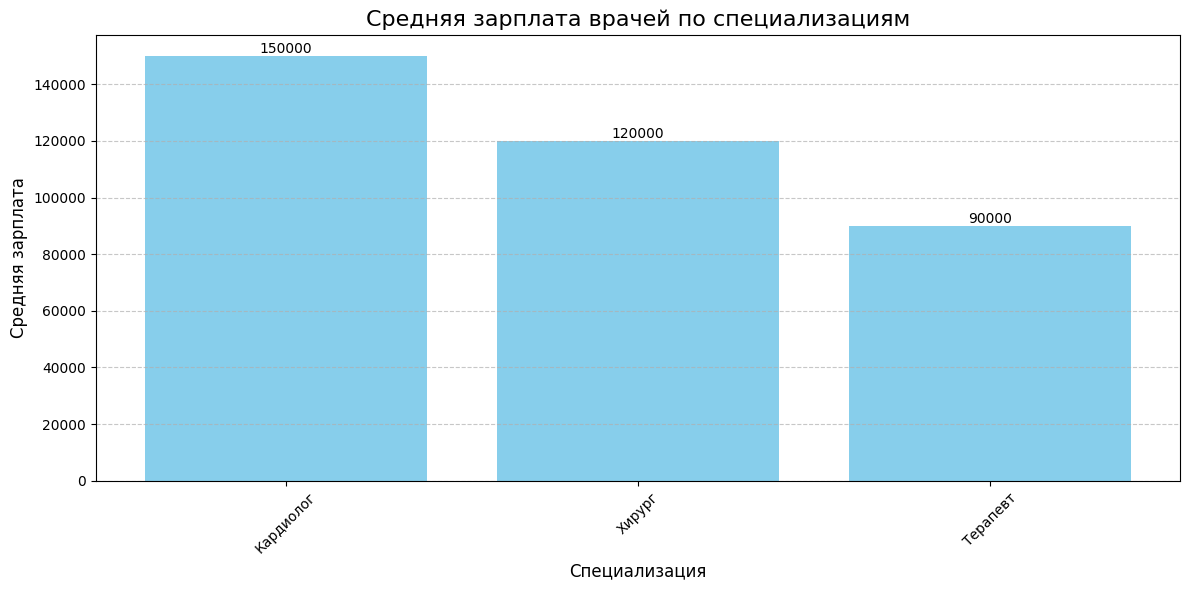


Детальные данные:
  specialization  avg_salary  doctors_count
0      Кардиолог    150000.0              1
1         Хирург    120000.0              2
2       Терапевт     90000.0              2


In [ ]:

!pip install seaborn psycopg2-binary pandas matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


conn_params = {
    "host": "localhost",
    "database": "medical__db", 
    "user": "postgres",
    "password": "1234", 
    "port": "5432"
}

try:

    conn = psycopg2.connect(**conn_params)
    
  
    query = """
    SELECT 
        specialization,
        AVG(salary) as avg_salary,
        COUNT(*) as doctors_count
    FROM Doctors
    GROUP BY specialization
    ORDER BY avg_salary DESC
    """
    
    df = pd.read_sql(query, conn)
    

    plt.figure(figsize=(12, 6))
    plt.bar(df['specialization'], df['avg_salary'], color='skyblue')

    plt.title('Средняя зарплата врачей по специализациям', fontsize=16)
    plt.xlabel('Специализация', fontsize=12)
    plt.ylabel('Средняя зарплата', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    for i, val in enumerate(df['avg_salary']):
        plt.text(i, val, f'{val:.0f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

    print("\nДетальные данные:")
    print(df)
    
except psycopg2.Error as e:
    print(f"Ошибка подключения к базе: {e}")
    print("Проверьте:")
    print("1. Запущен ли сервер PostgreSQL")
    print("2. Правильность параметров подключения")
    print(f"3. Существует ли база {conn_params['database']}")
except Exception as e:
    print(f"Ошибка: {e}")
finally:
    if 'conn' in locals():
        conn.close()